In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
product_info=pd.read_csv(r"C:\Users\DELL\Downloads\prod_cat_info.csv")
customer=pd.read_csv(r"C:\Users\DELL\Downloads\Customer.csv")
tranction=pd.read_csv(r"C:\Users\DELL\Downloads\Transactions.csv")


# Exploaratory Data Analysis

In [3]:
product_info.shape

(23, 4)

In [4]:
customer.shape

(5647, 4)

In [5]:
tranction.shape

(23053, 10)

In [6]:
product_info.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [7]:
tranction.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [8]:
customer.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,2/1/1970,M,4.0
1,269696,7/1/1970,F,8.0


In [9]:
product_info.rename(columns={'prod_sub_cat_code':'prod_subcat_code'},inplace=True)

In [10]:
#Merge the datasets Product Hierarchy and Transactions store it in product_data

In [11]:
product_data=pd.merge(tranction,product_info,on=['prod_cat_code','prod_subcat_code'],how='left')

In [12]:
product_data.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [13]:
#Merge the datasets product_data and customer store it in Customer_Final

In [14]:
Customer_Final=pd.merge(product_data,customer,left_on='cust_id',right_on='customer_Id', how='left')
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11/5/1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,8/6/1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0


In [15]:
Customer_Final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [16]:
Customer_Final.shape

(23053, 16)

In [17]:
tranction.shape

(23053, 10)

In [18]:
Customer_Final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [19]:
Customer_Final['DOB']=pd.to_datetime(Customer_Final['DOB'])
Customer_Final['DOB'].head(5)

0   1981-09-26
1   1973-11-05
2   1992-07-27
3   1981-08-06
4   1992-07-27
Name: DOB, dtype: datetime64[ns]

In [20]:
Customer_Final['tran_date']=pd.to_datetime(Customer_Final['tran_date'])
Customer_Final['tran_date']

0       2014-02-28
1       2014-02-27
2       2014-02-24
3       2014-02-24
4       2014-02-23
           ...    
23048   2011-01-25
23049   2011-01-25
23050   2011-01-25
23051   2011-01-25
23052   2011-01-25
Name: tran_date, Length: 23053, dtype: datetime64[ns]

# finding duplicates

In [21]:
Customer_Final.duplicated().sum()

13

In [22]:
Customer_Final.drop_duplicates(inplace=True)

In [23]:
Customer_Final.duplicated().sum()

0

# 2. Prepare a summary report for the merged data set.

In [24]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23040 non-null  int64         
 1   cust_id           23040 non-null  int64         
 2   tran_date         23040 non-null  datetime64[ns]
 3   prod_subcat_code  23040 non-null  int64         
 4   prod_cat_code     23040 non-null  int64         
 5   Qty               23040 non-null  int64         
 6   Rate              23040 non-null  int64         
 7   Tax               23040 non-null  float64       
 8   total_amt         23040 non-null  float64       
 9   Store_type        23040 non-null  object        
 10  prod_cat          23040 non-null  object        
 11  prod_subcat       23040 non-null  object        
 12  customer_Id       23040 non-null  int64         
 13  DOB               23040 non-null  datetime64[ns]
 14  Gender            2303

In [25]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-09-10,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-04-11,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [26]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-10-08,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-12-10,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


In [27]:
Customer_Final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23032.000000
mean,5.006955e+10,271021.880252,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,271021.880252,5.483067
std,2.898062e+10,2431.573668,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2431.573668,2.863331
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493315e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009188e+10,270980.500000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,270980.500000,5.000000
75%,7.532632e+10,273114.250000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,273114.250000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


In [28]:
Customer_Final.loc[:,Customer_Final.dtypes=='object'].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [29]:
contin_cust=Customer_Final.loc[:,['prod_subcat_code','prod_cat_code','Qty','Rate','Tax','total_amt']]
contin_cust.columns

Index(['prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

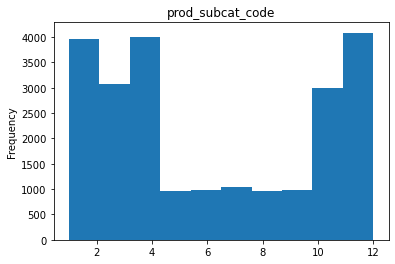

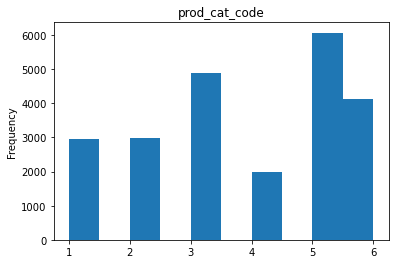

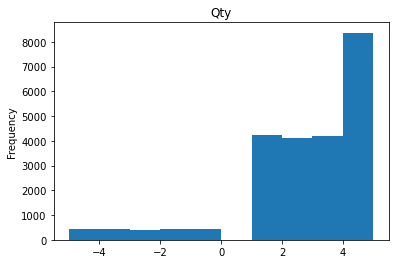

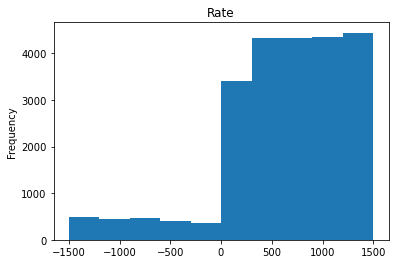

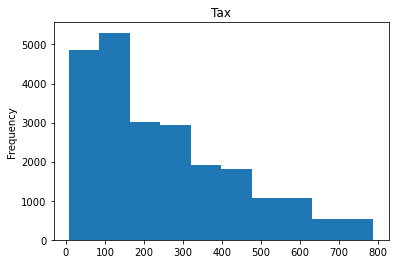

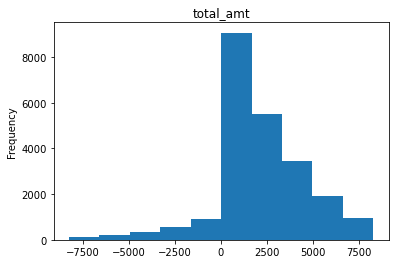

In [30]:
for i in contin_cust.columns:
    contin_cust[i].plot(kind='hist')
    plt.title(i)
    plt.show()

In [31]:
categorical=Customer_Final.loc[:,Customer_Final.dtypes=='object']

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

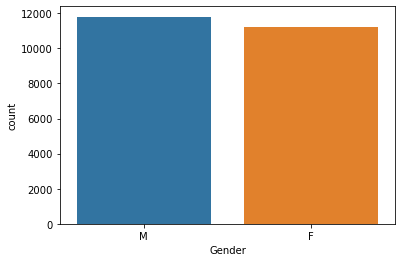

In [32]:
sns.countplot(categorical['Gender'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store_type', ylabel='count'>

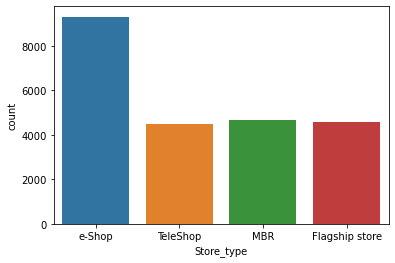

In [33]:
sns.countplot(categorical['Store_type'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prod_cat', ylabel='count'>

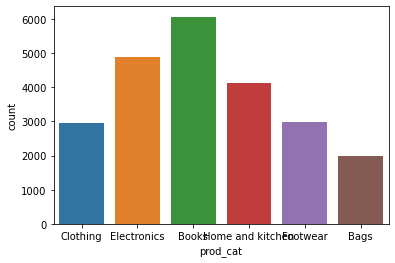

In [34]:
sns.countplot(categorical['prod_cat'])

<AxesSubplot:ylabel='prod_subcat'>

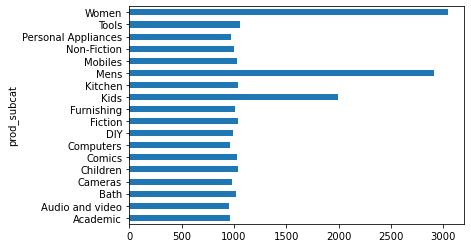

In [35]:
categorical.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')

# 4. Calculate the following information using the merged dataset :

In [36]:
Customer_Final.sort_values('tran_date')

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
22899,36332303449,268624,2011-01-02,10,6,-4,-295,123.900,-1303.900,Flagship store,Home and kitchen,Kitchen,268624,1986-09-18,F,1.0
22893,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,Home and kitchen,Furnishing,268904,1990-05-25,M,5.0
22894,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,Electronics,Computers,272756,1975-03-12,F,9.0
22895,28972634039,275227,2011-01-02,9,3,-1,-334,35.070,-369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0
22896,60041644943,267309,2011-01-02,3,2,1,392,41.160,433.160,Flagship store,Footwear,Women,267309,1973-08-04,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,Books,Children,270009,1979-04-25,M,3.0
162,83661978186,274678,2014-12-02,10,3,2,325,68.250,718.250,e-Shop,Electronics,Audio and video,274678,1975-05-20,F,9.0
147,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,Home and kitchen,Furnishing,275246,1970-06-25,M,3.0
154,74023090711,271180,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,Electronics,Personal Appliances,271180,1987-08-11,M,4.0


In [37]:
Date_max=Customer_Final['tran_date'].max()

In [38]:
Date_min=Customer_Final['tran_date'].min()

In [39]:
print(f'Time period of the available transaction data is {Date_max} to {Date_min}')

Time period of the available transaction data is 2014-12-02 00:00:00 to 2011-01-02 00:00:00


In [40]:
Customer_Final[Customer_Final.total_amt<0]['total_amt'].count()

2164

# 5. Analyze which product categories are more popular among females vs male customers

In [41]:
Customer_Final.loc[Customer_Final.Gender=='M','prod_cat'].value_counts()

Books               3116
Electronics         2567
Home and kitchen    2132
Clothing            1518
Footwear            1467
Bags                1004
Name: prod_cat, dtype: int64

In [42]:
Customer_Final.loc[Customer_Final.Gender=='F','prod_cat'].value_counts()

Books               2946
Electronics         2328
Home and kitchen    1993
Footwear            1528
Clothing            1439
Bags                 993
Name: prod_cat, dtype: int64

In [43]:
Customer_Final.groupby(['Gender','prod_cat'])['Qty'].count().reset_index()

,Gender,prod_cat,Qty
0,F,Bags,993
1,F,Books,2946
2,F,Clothing,1439
3,F,Electronics,2328
4,F,Footwear,1528
5,F,Home and kitchen,1993
6,M,Bags,1004
7,M,Books,3116
8,M,Clothing,1518
9,M,Electronics,2567


# 6. Which City code has the maximum customers and what was the percentage of customers from that city?


In [44]:
Max_customer=Customer_Final.groupby('city_code')['customer_Id'].count().sort_values(ascending=False)
Max_customer

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

In [45]:
percent=round((Max_customer[4.0]/Max_customer.sum())*100,2)
print(f'percentage of customers from that city: {percent}')

percentage of customers from that city: 10.52


# 7. Which store type sells the maximum products by value and by quantity?

In [46]:
print(Customer_Final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by='Qty',ascending=False))
print('e-shop sells the maximum products by value and by quantity')

                  Qty     Rate
Store_type                    
e-Shop          22790  5945770
MBR             11195  2953665
Flagship store  11142  2942874
TeleShop        10993  2836359
e-shop sells the maximum products by value and by quantity


C:\Users\DELL\AppData\Local\Temp/ipykernel_6388/3758225317.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(Customer_Final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by='Qty',ascending=False))


# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [47]:
flagship_table=Customer_Final.pivot_table(index='prod_cat',columns='Store_type',aggfunc='sum',values='total_amt')
flagship_table

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835,848678.675,789181.055,1617933.265
Books,2493677.810,2496039.195,2545714.470,5297161.155
Clothing,1194423.230,1287686.335,1241834.360,2527193.565
Electronics,2215136.040,2107969.825,1978457.195,4429142.770
Footwear,1234806.560,1112163.715,1235719.290,2643215.250
Home and kitchen,1713004.150,1822403.570,1581227.375,3327977.120


In [48]:
flagship_table.loc[['Electronics','Clothing'],'Flagship store'].sum()

3409559.27

# 9. What was the total amount earned from "Male" customers under the "Electronics" category?


In [49]:
male_elec=Customer_Final.pivot_table(index='prod_cat',columns='Gender',values='total_amt')
male_elec

Gender,F,M
prod_cat,,
Bags,2094.278792,2038.568715
Books,2095.923566,2132.853907
Clothing,2103.370956,2123.899536
Electronics,2156.079987,2224.912980
Footwear,2096.305769,2058.759622
Home and kitchen,2074.110504,2019.310274


In [50]:
round(male_elec.loc['Electronics',['M']],2)

Gender
M    2224.91
Name: Electronics, dtype: float64

# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?



In [51]:
removed_neg=Customer_Final.loc[Customer_Final.total_amt>0]
removed_neg

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023,1971-09-03,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,269345,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,268799,1979-06-27,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0


In [52]:
uniq=removed_neg.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
uniq

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [53]:
uniq_count=uniq.groupby('customer_Id')['transaction_id'].count().reset_index()
uniq_count

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [54]:
uniq_count.loc[uniq_count.transaction_id>10]
print('it has no customers have more than 10 unique transactions')

it has no customers have more than 10 unique transactions


# 11. For all customers aged between 25 - 35, find out:


In [88]:
now=pd.Timestamp('now')
Customer_Final['DOB'].where(Customer_Final['DOB']<now,Customer_Final['DOB'] - np.timedelta64(100,'Y'))
Customer_Final['Age']=(now-Customer_Final['DOB']).astype('<m8[Y]')
Customer_Final.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,40.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0,48.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,29.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-08-06,M,3.0,40.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,29.0


In [101]:
Customer_Final['Age_cat']=pd.cut(Customer_Final['Age'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)
Customer_Final.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Age,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,40.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-11-05,F,8.0,48.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,29.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-08-06,M,3.0,40.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,29.0,25-35


In [104]:
age_cat25_35=Customer_Final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()
age_cat25_35

Age_cat  prod_cat        
25-35    Bags                1164047.885
         Books               3552103.165
         Clothing            2027005.370
         Electronics         3238394.770
         Footwear            1902601.155
         Home and kitchen    2519451.935
36-46    Bags                1948105.055
         Books               6382042.420
         Clothing            2948907.975
         Electronics         5013624.785
         Footwear            2923680.825
         Home and kitchen    4117395.750
47-57    Bags                1014188.890
         Books               2898447.045
         Clothing            1275224.145
         Electronics         2478686.275
         Footwear            1399622.835
         Home and kitchen    1807764.530
Name: total_amt, dtype: float64

In [123]:
round(age_cat25_35.loc['25-35',['Electronics','Books']].sum(),2)

6790497.94

In [129]:
#filtering age cat 25-35
agecustomer_25_35=Customer_Final[Customer_Final.Age_cat=='25-35']
agecustomer_25_35.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Age,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,29.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,29.0,25-35
11,25455265351,267750,2014-02-20,12,6,3,1360,428.40,4508.40,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0,35.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.06,5494.06,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,32.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.20,-265.20,MBR,Bags,Women,268444,1992-02-01,F,6.0,30.0,25-35


In [144]:
round(agecustomer_25_35[(agecustomer_25_35['tran_date']>='2014-01-01')& (agecustomer_25_35['tran_date']<='2014-03-01')]['total_amt'].sum(),2)

475464.92